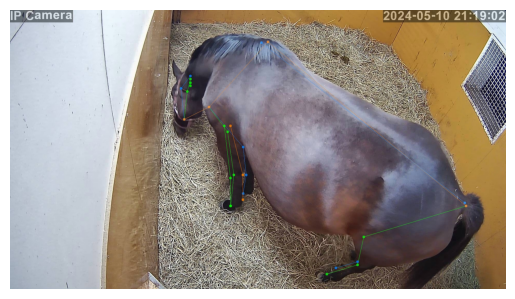

HTML(value='<h3>Current Image: 21_19_03.04.jpg</h3>')

Button(description='0', style=ButtonStyle())

Button(description='1', style=ButtonStyle())

Button(description='2', style=ButtonStyle())

Button(description='3', style=ButtonStyle())

Button(description='4', style=ButtonStyle())

Button(description='5', style=ButtonStyle())

Button(description='6', style=ButtonStyle())

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from ipywidgets import widgets

# 入力データフォルダのパス
input_folder = '/home/osamu/horse_data/c100_label'

# CSVファイルのパス
csv_file = '/home/osamu/horse_data/c100_label/position_id.csv'

# フォルダ内の画像ファイルを取得し、名前順にソート
image_files = sorted([f for f in os.listdir(input_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

# ファイル名（拡張子なし）を取得
image_files_no_ext = [os.path.splitext(f)[0] for f in image_files]

# CSVファイルが存在しない場合、新規作成
if not os.path.exists(csv_file):
    df = pd.DataFrame({'filename': image_files_no_ext, 'Label': [None] * len(image_files)})
    df.to_csv(csv_file, index=False)
else:
    df = pd.read_csv(csv_file)

# 画像表示とラベル選択のインターフェースを作成
def display_image(image_path):
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def on_button_clicked(b):
    global current_index
    label = int(b.description)
    filename_no_ext = os.path.splitext(image_files[current_index])[0]
    df.loc[df['filename'] == filename_no_ext, 'Label'] = label
    df.to_csv(csv_file, index=False)
    current_index += 1
    if current_index < len(image_files):
        update_interface()
    else:
        print("All images have been labeled.")

def update_interface():
    clear_output(wait=True)
    current_image_file = image_files[current_index]
    display_image(os.path.join(input_folder, current_image_file))
    display(widgets.HTML(f"<h3>Current Image: {current_image_file}</h3>"))
    for button in buttons:
        display(button)

# ボタンの作成
buttons = [widgets.Button(description=str(i)) for i in range(7)]
for button in buttons:
    button.on_click(on_button_clicked)

current_index = 0

# インターフェースの初期表示
update_interface()
